In [1]:
#libration.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 10 January 2018.
#simulate a narrow eccentric ringlet that librates around equilibrium

In [2]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

In [3]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, lambda0 = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
print 'r.shape = ', r.shape

r.shape =  (1001, 3, 51)


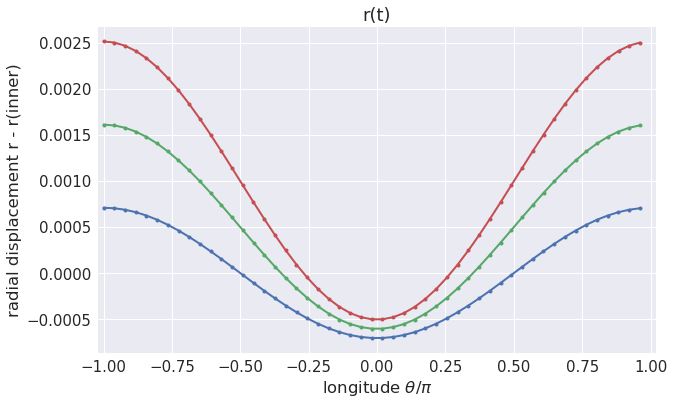

In [4]:
#check initial r(theta)
tidx = 0
r0 = r[tidx]
t0 = t[tidx]
f, ax = plt.subplots(figsize=(10, 6))
for pidx in range(number_of_streamlines):
    x = t0[pidx, :]/np.pi
    y = r0[pidx, :] - r0[0, :].mean()
    ax.plot(x, y, marker='o', markersize=4, linestyle='-', linewidth=2)
p = ax.set_xlim(-1.02, 1.02)
p = ax.set_title('r(t)')
p = ax.set_xlabel(r'longitude $\theta/\pi$')
p = ax.set_ylabel('radial displacement r - r(inner)')

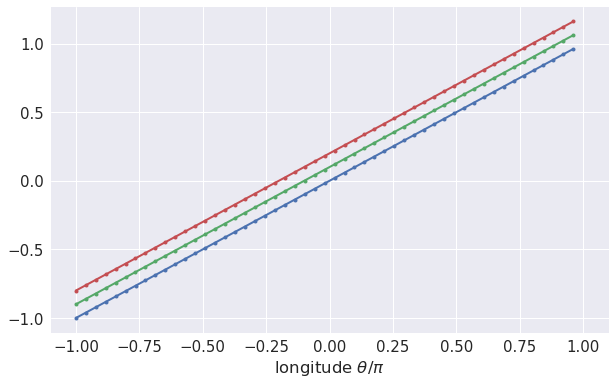

In [5]:
#check each streamline's intial t
tidx = 0
t0 = t[tidx]
f, ax = plt.subplots(figsize=(10, 6))
for pidx in range(number_of_streamlines):
    x = t0[pidx]/np.pi
    ax.plot(x, x + 0.1*pidx, marker='o', markersize=4, linestyle='-', linewidth=2)
p = ax.set_xlim(-1.1, 1.1)
p = ax.set_xlabel(r'longitude $\theta/\pi$')

In [6]:
#calculate delta_wt delta_e delta_a versus time
delta_wt = []
delta_e = []
delta_a = []
for tidx in range(len(times)):
    r0 = r[tidx]
    r_inner = r0[0]
    r_outer = r0[-1]
    pidx_inner = r_inner.argmin()
    pidx_outer = r_outer.argmin()
    wt0 = wt[tidx]
    wt_inner = wt0[0]
    wt_outer = wt0[-1]
    dwt = (wt_outer - wt_inner)[pidx_inner]
    if (dwt > np.pi):
        dwt -= 2*np.pi
    if (dwt < -np.pi):
        dwt += 2*np.pi
    delta_wt += [dwt]
    e0 = e[tidx]
    e_inner = e0[0]
    e_outer = e0[-1]
    de = (e_outer - e_inner)[pidx_inner]
    delta_e += [de]
    a0 = a[tidx]
    a_inner = a0[0]
    a_outer = a0[-1]
    da = (a_outer - a_inner)[pidx_inner]
    delta_a += [da]
delta_wt = np.array(delta_wt)
delta_e = np.array(delta_e)
delta_a = np.array(delta_a)

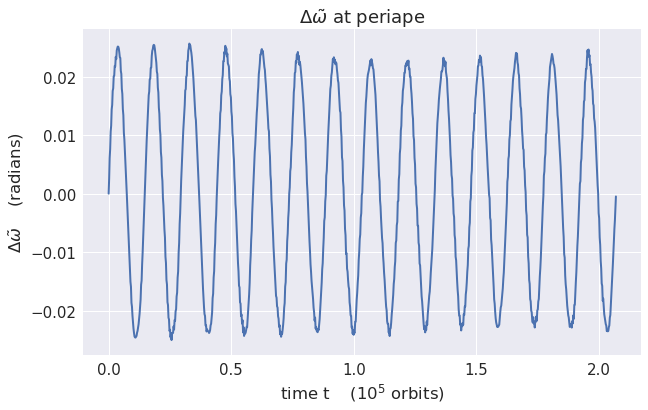

In [7]:
#plot delta_wt versus time
x = times/(2*np.pi)/1.0e5
y = delta_wt
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, linestyle='-', linewidth=2)
p = ax.set_title(r'$\Delta\tilde{\omega}$ at periape')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$    (radians)')

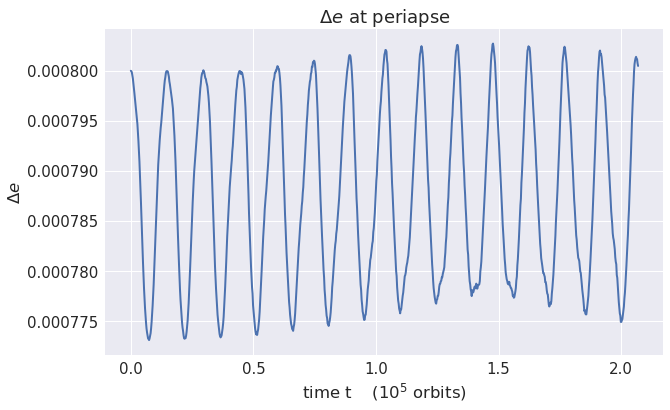

In [8]:
#plot delta_e versus time
x = times/(2*np.pi)/1.0e5
y = delta_e
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, linestyle='-', linewidth=2)
p = ax.set_title(r'$\Delta e$ at periapse')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'$\Delta e$')

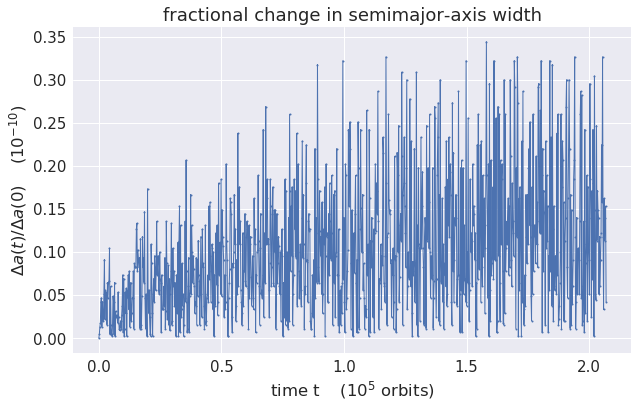

In [9]:
#plot fractional change in delta_a versus time
x = times/(2*np.pi)/1.0e5
y = np.abs(delta_a/delta_a[0] - 1.0)/1.0e-10
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, marker='o', markersize=2, linestyle='-', linewidth=1)
p = ax.set_title('fractional change in semimajor-axis width')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'$\Delta a(t)/\Delta a(0)$    ($10^{-10}$)')

In [10]:
#calculate ring radial width at peri, apo, and quadature versus time
delta_r_peri = []
for tidx in range(len(times)):
    rt = r[tidx]
    rt_inner = rt[0]
    rt_outer = rt[-1]
    dr = rt_outer - rt_inner
    pidx = rt_inner.argmin()
    dr_peri = dr[pidx]
    delta_r_peri += [dr_peri]
delta_r_peri = np.array(delta_r_peri)

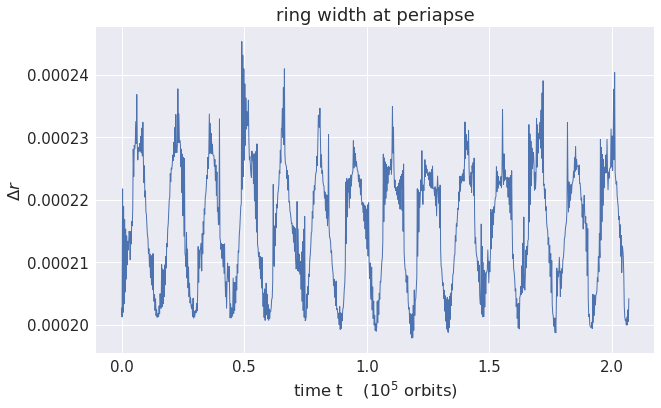

In [11]:
#plot delta_r_peri versus time
x = times/(2*np.pi)/1.0e5
y = delta_r_peri.copy()
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, linestyle='-', linewidth=1)
p = ax.set_title('ring width at periapse')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'$\Delta r$')

In [12]:
#angular momentum conservation
mass = lambda0*2*np.pi*a[0]/particles_per_streamline
print 'total ring mass = ', mass.sum()
ang_mom = []
for tidx in range(len(times)):
    l = (mass*(r[tidx]*vt[tidx])).sum()
    ang_mom += [l]
ang_mom = np.array(ang_mom)
delta_ang_mom = np.abs(ang_mom - ang_mom[0])/ang_mom[0]
print 'max fractional change in angular momentum = ', delta_ang_mom.max()

total ring mass =  5e-11
max fractional change in angular momentum =  1.80226628512e-15


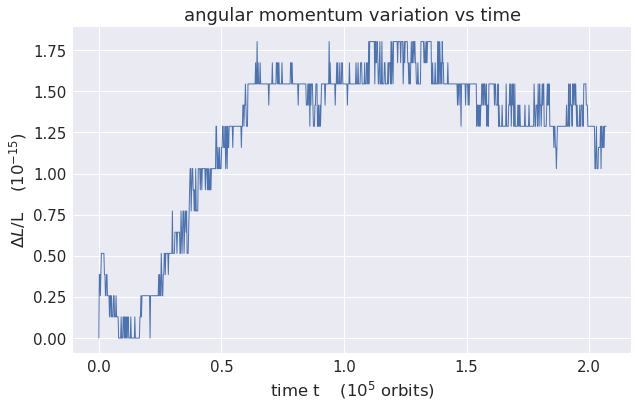

In [13]:
#plot delta_ang_mom versus time
x = times/(2*np.pi)/1.0e5
y = delta_ang_mom/1.0e-15
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, linestyle='-', linewidth=1)
p = ax.set_title('angular momentum variation vs time')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'$\Delta L$/L    ($10^{-15}$)')